# Mario Machine Learning Program

This is a project where Karolina, Joanne and Ben are going to work together to make a program that can detect whether the character image inputted is Mario or not

## Converting the images into arrays

In [21]:
import numpy as np
import random
from sklearn import svm
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split

images = []
categories = ['Mario', 'Luigi', 'Wario']
data = []

directory = 'images\\'

for category in categories:
    parent_folder = os.path.join(directory, category)
    label = categories.index(category)
    for filename in os.listdir(parent_folder):
        # Guard-clause to make sure only images are being loaded in
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_read = io.imread(os.path.join(parent_folder, filename), as_gray=True)
            img_resize = resize(img_read, (50,50))
            img = np.array(img_resize).flatten()
            data.append([img, label])
        else:
            continue


## Learning

In [22]:
random.shuffle(data)
features = []
labels = []

for feature, label in data:
    features.append(feature)
    labels.append(label)

clf = svm.SVC(gamma=0.001, C=100.)

x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.25)

clf.fit(x_train, y_train)

SVC(C=100.0, gamma=0.001)

## Predictions

### Prediction 1: Using test_mario1.png

The character of this image is: Mario


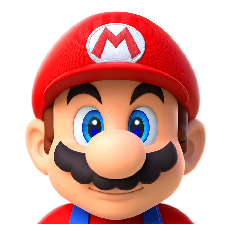

In [23]:
import matplotlib.pyplot as plt

test_mario = io.imread(os.path.join(directory, "Test Images", "test_mario1.png"))
plt.axis('off')
plt.imshow(test_mario, cmap=plt.cm.gray_r, interpolation='nearest')

print("The character of this image is: Mario")

In [24]:
test_mario_img_read = io.imread(os.path.join(directory, "Test Images", "test_mario1.png"), as_gray=True)
test_mario_img_resize = resize(test_mario_img_read, (50,50))
test_mario_img = np.array(test_mario_img_resize).flatten()

prediction_value = clf.predict([test_mario_img])[0]
prediction_character = categories[prediction_value]

print("The predicted character is:", prediction_character)

The predicted character is: Wario


### Prediction 2: Using test_luigi1.png

The character of this image is: Luigi


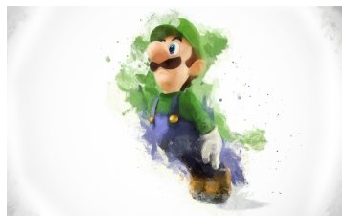

In [25]:
test_luigi = io.imread(os.path.join(directory, "Test Images", "test_luigi1.png"))
plt.axis('off')
plt.imshow(test_luigi, cmap=plt.cm.gray_r, interpolation='nearest')

print("The character of this image is: Luigi")

In [26]:
test_luigi_img_read = io.imread(os.path.join(directory, "Test Images", "test_luigi1.png"), as_gray=True)
test_luigi_img_resize = resize(test_luigi_img_read, (50,50))
test_luigi_img = np.array(test_luigi_img_resize).flatten()

prediction_value = clf.predict([test_luigi_img])[0]
prediction_character = categories[prediction_value]

print("The predicted character is:", prediction_character)

The predicted character is: Luigi


### Prediction 3: Using test_wario1.png

The character of this image is: wario


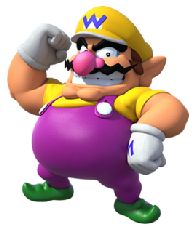

In [27]:
test_wario = io.imread(os.path.join(directory, "Test Images", "test_wario1.png"))
plt.axis('off')
plt.imshow(test_wario, cmap=plt.cm.gray_r, interpolation='nearest')

print("The character of this image is: wario")

In [28]:
test_wario_img_read = io.imread(os.path.join(directory, "Test Images", "test_wario1.png"), as_gray=True)
test_wario_img_resize = resize(test_wario_img_read, (50,50))
test_wario_img = np.array(test_wario_img_resize).flatten()

prediction_value = clf.predict([test_wario_img])[0]
prediction_character = categories[prediction_value]

print("The predicted character is:", prediction_character)

The predicted character is: Wario


## Time to do some learning: Mario Teaches Typing

The character of this Wario


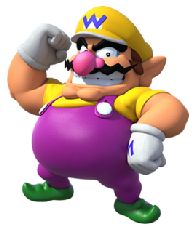

In [29]:
test_img_read = io.imread(os.path.join(directory, "Test Images", "test_wario1.png"))
plt.axis('off')
plt.imshow(test_img_read, cmap=plt.cm.gray_r, interpolation='nearest')

print("The character of this Wario")

In [32]:
from sklearn.svm import SVC

test_img_read = io.imread(os.path.join(directory, "Test Images", "test_wario1.png"), as_gray=True)
test_img_resize = resize(test_img_read, (50,50))
test_img = np.array(test_img_resize).flatten()

clf = SVC()
clf.set_params(kernel='linear').fit(x_train, y_train)
prediction_value = clf.predict([test_img])[0]
prediction_character = categories[prediction_value]

print("The predicted character is:", prediction_character)

answ = input("Is this right? Y/N ")

##the guess never changes the second time
if answ == "N":
    clf = SVC()
    clf.set_params(kernel='rbf').fit(x_train, y_train)
    clf.predict([test_img])[0]
    print("The predicted character is:", prediction_character)

The predicted character is: Wario


In [33]:
##Used to be the while loop
while answ != "Y":
    clf = SVC()
    clf.set_params(kernel='rbf').fit(x_train, y_train)
    clf.predict([test_img])[0]
    print("The predicted character is:", prediction_character)
    answ = input("Is this right? Y/N ")
    if answ == "":
        break

## Accuracy

In [14]:
accuracy = round(clf.score(x_test, y_test), 3) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 53.300000000000004 %
